In [16]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/titanic.csv')

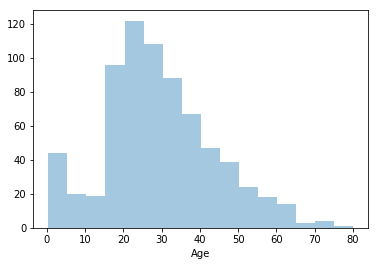

In [17]:
ls_age = df['Age'].dropna()

sns.distplot(ls_age, hist=True, kde=False, bins=16)

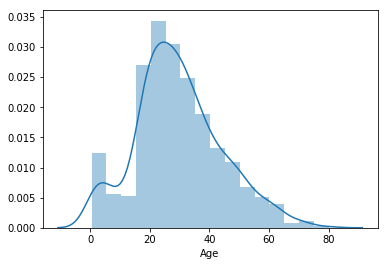

In [18]:
sns.distplot(ls_age, hist=True, kde=True, bins=16)

In [19]:
def custom_hist(ls, interval):
    hist_ls_dict = dict()

    min_ls = np.min(ls)

    max_ls = np.max(ls)
    print(max_ls)

    I = ((max_ls - min_ls) / interval)
    print(I)

    for j in range(interval):
        hist_ls_dict[(min_ls + j*I, min_ls + (j+1) *I)]= np.sum(((min_ls + j*I) <=ls) & (ls <= (min_ls + (j+1) *I)))

    return hist_ls_dict

print(custom_hist(ls_age, 16))

80.0
4.97375
{(0.42, 5.39375): 44, (5.39375, 10.3675): 20, (10.3675, 15.34125): 19, (15.34125, 20.315): 96, (20.315, 25.28875): 122, (25.28875, 30.262500000000003): 108, (30.262500000000003, 35.23625): 88, (35.23625, 40.21): 67, (40.21, 45.18375): 47, (45.18375, 50.1575): 39, (50.1575, 55.13125): 24, (55.13125, 60.105000000000004): 18, (60.105000000000004, 65.07875): 14, (65.07875, 70.0525): 3, (70.0525, 75.02625): 4, (75.02625, 80.0): 1}


In [20]:
how_many_younger_40 = df[df['Age'] <= 40]
pr_below_40 = len(how_many_younger_40)/len(df['Age'].dropna())
print(pr_below_40)

0.7899159663865546


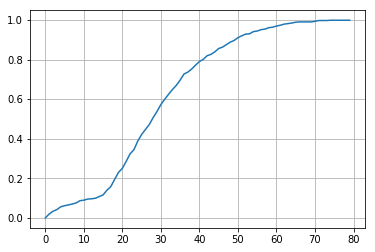

In [21]:
def calculate_cdf(x, threshold):
    return np.sum(x <= threshold)

cdf_age = []
min_val = np.min(ls_age)
threshold = np.min(ls_age)

for r in range(int(np.min(ls_age)), int(np.max(ls_age))):
    less_than_threshold = calculate_cdf(ls_age, r)
    
    age_value = less_than_threshold/len(ls_age)

    cdf_age.append(age_value)

plt.plot(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)
plt.grid()

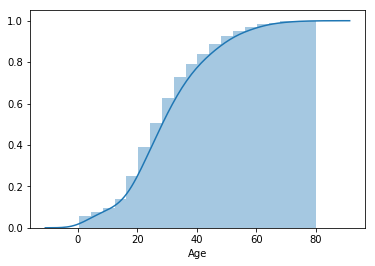

In [22]:
sns.distplot(df['Age'].dropna(), hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))


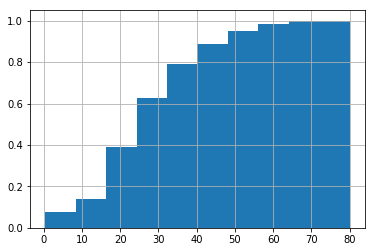

In [23]:
df['Age'].dropna().hist(cumulative=True, density=True)

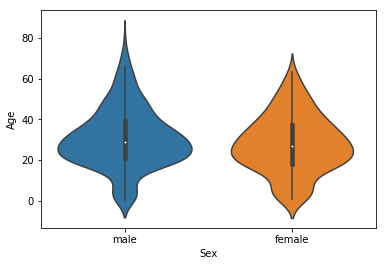

In [24]:
sns.violinplot(x="Sex", y="Age", data=df)

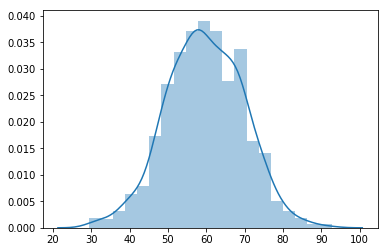

In [25]:
a = np.random.normal(60, 10, 1000)
sns.distplot(a, hist=True, kde=True, bins=20)

In [27]:
from scipy.stats import norm
norm.cdf(70, loc=60, scale=10)

0.8413447460685429

In [28]:
norm.cdf(70, loc=60, scale=10) - norm.cdf(50, loc=60, scale=10)

0.6826894921370859

1.017635491783347

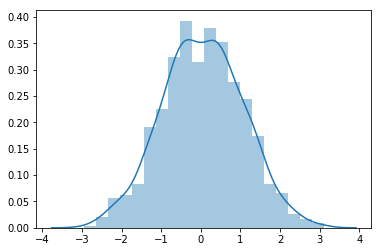

In [29]:
exam_scores = np.random.normal(60, 10, 1000)

normalized_scores = []
for score in exam_scores:
    # subtract the mean of list from the value, 
    # and divide this difference by the standard deviation
    normal_score = (score - 60)/10
    normalized_scores.append(normal_score)

sns.distplot(normalized_scores, hist=True, kde=True, bins=20)

In [30]:
print(np.mean(normalized_scores))
print(np.std(normalized_scores))

0.04457741406741851
1.017635491783347
